In [545]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [546]:
from sklearn import linear_model
from sklearn import metrics

In [547]:
import psycopg2

# connect to the PostgreSQL server
conn = psycopg2.connect(host="imt575group4.cdzfpivjhvbj.us-east-1.rds.amazonaws.com", database="imt575", user="amir", password="pleasework123")

In [548]:
def minmaxscale(x):
    a = (x - x.min())/(x.max() - x.min())
    return a

### Only Business Characterstics

In [534]:
neighborhood = pd.read_sql('SELECT * from business_neighborhood_view_2',conn)

neighborhood.columns

Index(['business_id', 'review_count', 'stars', 'accepts_credit_cards',
       'good_for_kids', 'outdoor_seating', 'restaurants_delivery',
       'restaurants_price_range', 'restaurants_reservations',
       'restaurants_takeout', 'neighborhood', 'business_parking',
       'business_count', 'gini_index', 'num_check_ins', 'stars_cont',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count',
       'dist_to_auto', 'dist_to_arts', 'dist_to_restaurants',
       'dist_to_beautysvc', 'dist_to_pets', 'dist_to_professional',
       'dist_to_hotelstravel', 'dist_to_shopping', 'dist_to_eventservices',
       'dist_to_nightlife', 'dist_to_health', 'dist_to_localservices',
       'dist_to_financialservices', 'dist_to_homeservices',
       'dist_to_realestate', 'dist_to_active', 'dist_to_religiousorgs',
       'dist_to_localflavor', 'dist_to_publicservicesgovt',
       'dist_to_education', 'dist_to_massmedia', 'dist_to

In [535]:
business = neighborhood[['review_count', 'stars', 'accepts_credit_cards',
       'good_for_kids', 'outdoor_seating', 'restaurants_delivery',
       'restaurants_price_range', 'restaurants_reservations',
       'restaurants_takeout','business_parking',]]

In [536]:
y=business['stars']
X = business.drop('stars',axis=1)

In [537]:
# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:0,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])

In [538]:
y.value_counts()

0    4915
1    3538
Name: stars, dtype: int64

In [539]:
X = pd.get_dummies(X)
X_bete = X.apply(minmaxscale)


In [540]:
X_train, X_test, y_train, y_test = train_test_split(X_bete, y, test_size=0.20, random_state=42)

In [541]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6493199290360734

#### Logistic Regression

In [411]:
clf = LogisticRegression(C=1500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6321703134240094

In [542]:
cv = cross_validate(clf,X_bete,y,cv=5)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.36572576, 0.34258699, 0.4508419 , 0.33519101, 0.42596292]),
 'score_time': array([0.00313926, 0.00495815, 0.00375104, 0.00337195, 0.00303006]),
 'test_score': array([0.63867534, 0.59905381, 0.644589  , 0.6260355 , 0.62248521]),
 'train_score': array([0.66296954, 0.67213842, 0.65764567, 0.66627236, 0.66242792])}

In [543]:
np.mean(cv['test_score'])

0.6261677729994156

In [392]:
metrics.f1_score(y_test,y_pred)

0.3580613254203759

In [396]:
clf = LogisticRegression(C=1500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6321703134240094

In [397]:
metrics.f1_score(y_test,y_pred)

0.38537549407114624

~67%

In [394]:
metrics.precision_score(y_test,y_pred)

0.6230031948881789

In [395]:
metrics.recall_score(y_test,y_pred)

0.27896995708154504

#### Statsmodel

In [477]:
from scipy import stats
stats.chisqprob = lambda chisq, X_train: stats.chi2.sf(chisq, X_train)

In [480]:
import statsmodels.api as sm
X_bete = sm.add_constant(X_bete)
mdl = sm.Logit(y, X_bete)
mdl_fit = mdl.fit(maxiter=100)
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.654617
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                 8453
Model:                          Logit   Df Residuals:                     8443
Method:                           MLE   Df Model:                            9
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:                 0.03707
Time:                        20:03:04   Log-Likelihood:                -5533.5
converged:                       True   LL-Null:                       -5746.5
                                        LLR p-value:                 3.718e-86
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2485      0.210      1.185      0.236      -0.162

In [481]:
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stars   No. Observations:                 8453
Model:                          Logit   Df Residuals:                     8443
Method:                           MLE   Df Model:                            9
Date:                Sat, 01 Dec 2018   Pseudo R-squ.:                 0.03707
Time:                        20:03:05   Log-Likelihood:                -5533.5
converged:                       True   LL-Null:                       -5746.5
                                        LLR p-value:                 3.718e-86
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.2485      0.210      1.185      0.236      -0.162       0.659
review_count                 8.5142      0.839     10.144      0.000       6.869      10.159
accepts_credit_cards        -1.0377      0.188     -5.533      0.000      -1.405      -0.670
good_for_kids               -0.0763      0.080     -0.954      0.340      -0.233       0.081
outdoor_seating              0.2804      0.059      4.789      0.000       0.166       0.395
restaurants_delivery         0.5374      0.063      8.565      0.000       0.414       0.660
restaurants_price_range     -0.2283      0.130     -1.762      0.078      -0.482       0.026
restaurants_reservations     0.5124      0.065      7.849      0.000       0.384       0.640
restaurants_takeout         -0.0744      0.081     -0.915      0.360      -0.234       0.085
business_parking             0.1532      0.054      2.862      0.004       0.048       0.258
============================================================================================
"""

In [482]:
print(mdl_fit.pred_table())

[[4263.  652.]
 [2594.  944.]]


#### Random Forest

In [20]:
X_train =X_train.drop('const',axis=1)

In [21]:
# 1000 trees
clf = RandomForestClassifier(1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.589247311827957

In [22]:
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.5885304659498208

### Neighborhood Model

In [549]:
#neighborhood = pd.read_sql('SELECT * from vegas_restaurants_neigh_dist',conn)
neighborhood = pd.read_sql('SELECT * from business_neighborhood_view',conn)
df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

In [550]:
X.columns

Index(['review_count', 'accepts_credit_cards', 'good_for_kids',
       'outdoor_seating', 'restaurants_delivery', 'restaurants_price_range',
       'restaurants_reservations', 'restaurants_takeout', 'neighborhood',
       'business_parking', 'business_count', 'gini_index',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count',
       'dist_to_auto', 'dist_to_arts', 'dist_to_beautysvc', 'dist_to_pets',
       'dist_to_professional', 'dist_to_hotelstravel', 'dist_to_shopping',
       'dist_to_eventservices', 'dist_to_nightlife', 'dist_to_health',
       'dist_to_localservices', 'dist_to_financialservices',
       'dist_to_homeservices', 'dist_to_realestate', 'dist_to_active',
       'dist_to_religiousorgs', 'dist_to_localflavor',
       'dist_to_publicservicesgovt', 'dist_to_education', 'dist_to_massmedia',
       'dist_to_strip', 'kmeans_label', 'kmeans_gini'],
      dtype='object')

In [551]:
# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:0,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])


In [552]:
y.value_counts()

0    4915
1    3538
Name: stars, dtype: int64

In [553]:
def mile_to_meter(x):
    a = x*1609.34
    return a

In [554]:
X['dist_to_strip'] = X['dist_to_strip'].apply(mile_to_meter)

In [555]:
X = pd.get_dummies(X)
X_bete = X.apply(minmaxscale)

In [556]:
X_train, X_test, y_train, y_test = train_test_split(X_bete, y, test_size=0.33, random_state=42)

In [557]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [558]:
metrics.accuracy_score(y_test,y_pred)

0.6326164874551972

In [563]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [560]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [561]:
metrics.accuracy_score(y_test,y_pred)

0.6741935483870968

In [562]:
from sklearn.model_selection import cross_validate
cv = cross_validate(clf,X_bete,y)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([2.17895412, 1.96829963, 1.92900515]),
 'score_time': array([0.00739908, 0.00689936, 0.00848103]),
 'test_score': array([0.64952111, 0.66773163, 0.65566205]),
 'train_score': array([0.74387646, 0.73527324, 0.73917672])}

In [564]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [565]:
from sklearn.model_selection import cross_validate
cv = cross_validate(clf,X_bete,y)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.18018198, 0.15584588, 0.18027973]),
 'score_time': array([0.00994778, 0.00791407, 0.0080092 ]),
 'test_score': array([0.61298333, 0.63081292, 0.62122826]),
 'train_score': array([0.97923323, 0.98136977, 0.98456352])}

In [568]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.05, 1.0, 15)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(15,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    #print('Train',train_scores)
    
    #print('Test',test_scores)
    train_scores_mean = np.mean(train_scores, axis=1)
    #print('Train Mean',train_scores_mean)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    #print('Test Mean',test_scores_mean)
    #print('Test Mean', test_scores_std)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.ylim(0,1)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

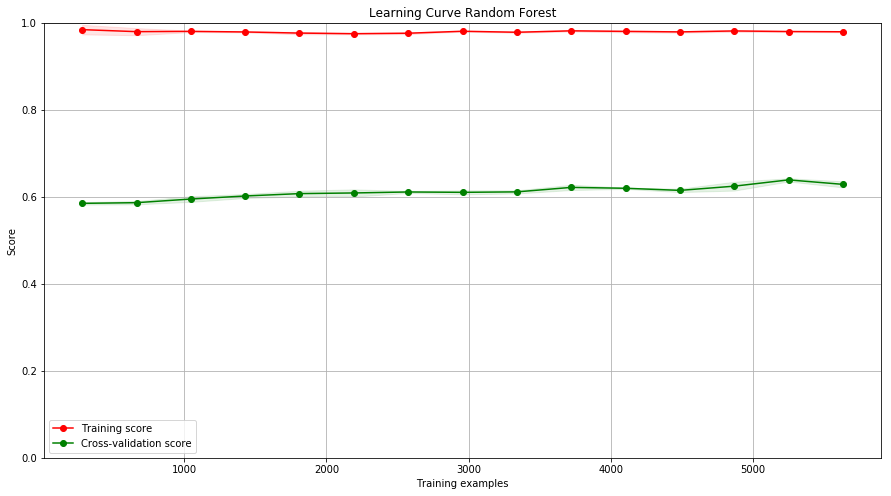

In [569]:
from sklearn.model_selection import learning_curve
plot_learning_curve(clf,'Learning Curve Random Forest',X_bete,y)

#### Logistic Regression - Adjusting weights

In [267]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [268]:
metrics.accuracy_score(y_test,y_pred)

0.6121863799283154

#### Finding the best value of Lambda

In [269]:
lambda_values = np.logspace(-6,6,50)
a = []

for i in lambda_values:
    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    a.append(metrics.accuracy_score(y_test, y_pred))

In [270]:
a

[0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5831541218637993,
 0.5838709677419355,
 0.5917562724014337,
 0.5992831541218638,
 0.6086021505376344,
 0.6025089605734767,
 0.6028673835125448,
 0.6043010752688172,
 0.6057347670250897,
 0.6082437275985663,
 0.6082437275985663,
 0.613978494623656,
 0.6197132616487455,
 0.6211469534050179,
 0.621505376344086,
 0.6268817204301075,
 0.6315412186379928,
 0.6326164874551972,
 0.632258064516129,
 0.632258064516129,
 0.6340501792114696,
 0.6347670250896057,
 0.6333333333333333,
 0.6329749103942652,
 0.6340501792114696,
 0.6351254480286739,
 0.6340501792114696,
 0.6340501792114696,
 0.6340501792114696,
 0.6344086021505376,
 0.6340501792114696,
 0.6340501792114696,
 0.6340501792114696,
 0.6340501792114696,
 0.6344086021505376,
 0.63405017921146

In [271]:
np.log(2.33572147e+05)

12.361246289094426

In [272]:
lambda_values

array([1.00000000e-06, 1.75751062e-06, 3.08884360e-06, 5.42867544e-06,
       9.54095476e-06, 1.67683294e-05, 2.94705170e-05, 5.17947468e-05,
       9.10298178e-05, 1.59985872e-04, 2.81176870e-04, 4.94171336e-04,
       8.68511374e-04, 1.52641797e-03, 2.68269580e-03, 4.71486636e-03,
       8.28642773e-03, 1.45634848e-02, 2.55954792e-02, 4.49843267e-02,
       7.90604321e-02, 1.38949549e-01, 2.44205309e-01, 4.29193426e-01,
       7.54312006e-01, 1.32571137e+00, 2.32995181e+00, 4.09491506e+00,
       7.19685673e+00, 1.26485522e+01, 2.22299648e+01, 3.90693994e+01,
       6.86648845e+01, 1.20679264e+02, 2.12095089e+02, 3.72759372e+02,
       6.55128557e+02, 1.15139540e+03, 2.02358965e+03, 3.55648031e+03,
       6.25055193e+03, 1.09854114e+04, 1.93069773e+04, 3.39322177e+04,
       5.96362332e+04, 1.04811313e+05, 1.84206997e+05, 3.23745754e+05,
       5.68986603e+05, 1.00000000e+06])

No handles with labels found to put in legend.


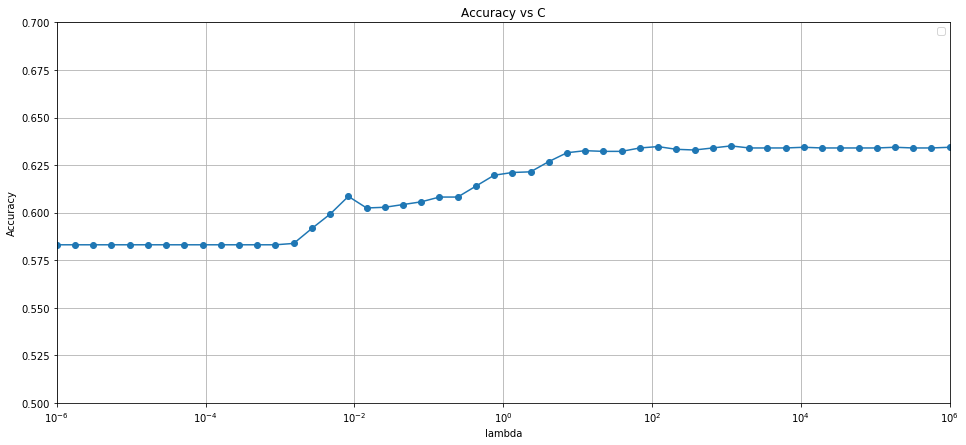

In [273]:
plt.figure(figsize=(16,7))
plt.plot(lambda_values,a,marker='o')
plt.grid()
plt.ylim([0.50, 0.70])
plt.xlim([0.000001, 1000000])
plt.xlabel('lambda')
plt.xscale('log')
plt.ylabel('Accuracy')
#plt.legend(loc="lower right")
plt.title('Accuracy vs C')
plt.legend()
plt.show()

the best value of C is 323745

In [276]:
# trying class weights with C = 50
clf = LogisticRegression(C=1/100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6053763440860215

In [282]:
clf = LogisticRegression(C=1151)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6351254480286739

Still does not improve. The accuracy is 67.40 without class weights

#### Statsmodel

In [192]:
neighborhood = pd.read_sql('SELECT * from business_neighborhood_view',conn)
df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

In [193]:
# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:0,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])


In [194]:
X = X.drop('neighborhood',axis=1)

In [195]:
X = pd.get_dummies(X)
X_bete = X.apply(minmaxscale)

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X_bete, y, test_size=0.33, random_state=42)

In [197]:
y.value_counts()

0    4915
1    3538
Name: stars, dtype: int64

In [198]:
from scipy import stats
stats.chisqprob = lambda chisq, X_train: stats.chi2.sf(chisq, X_train)

In [199]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
mdl = sm.Logit(y_train, X_train)
mdl_fit = mdl.fit(maxiter=100)
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.637596
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                 5663
Model:                          Logit   Df Residuals:                     5623
Method:                           MLE   Df Model:                           39
Date:                Fri, 30 Nov 2018   Pseudo R-squ.:                 0.06249
Time:                        21:22:09   Log-Likelihood:                -3610.7
converged:                       True   LL-Null:                       -3851.4
                                        LLR p-value:                 1.340e-77
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8003      0.398     -2.010      0.044      

In [150]:
mdl_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  stars   No. Observations:                 5663
Model:                          Logit   Df Residuals:                     5623
Method:                           MLE   Df Model:                           39
Date:                Fri, 30 Nov 2018   Pseudo R-squ.:                 0.06249
Time:                        20:53:13   Log-Likelihood:                -3610.7
converged:                       True   LL-Null:                       -3851.4
                                        LLR p-value:                 1.340e-77
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.8003      0.398     -2.010      0.044      -1.581      -0.020
review_count                   9.6945      1.077      9.000      0.000       7.583      11.806
accepts_credit_cards          -1.0296      0.225     -4.584      0.000      -1.470      -0.589
good_for_kids                 -0.2069      0.099     -2.087      0.037      -0.401      -0.013
outdoor_seating                0.1618      0.074      2.185      0.029       0.017       0.307
restaurants_delivery           0.4394      0.079      5.559      0.000       0.284       0.594
restaurants_price_range       -0.0630      0.165     -0.383      0.702      -0.386       0.260
restaurants_reservations       0.4775      0.082      5.817      0.000       0.317       0.638
restaurants_takeout           -0.0545      0.102     -0.533      0.594      -0.255       0.146
business_parking               0.1783      0.068      2.629      0.009       0.045       0.311
business_count                 1.1758      0.481      2.443      0.015       0.232       2.119
gini_index                     1.7562      0.349      5.029      0.000       1.072       2.441
hotelstravel_count            -0.9779      0.466     -2.098      0.036      -1.892      -0.064
auto_count                     0.3526      0.407      0.866      0.386      -0.445       1.150
arts_count                    -0.9924      0.994     -0.998      0.318      -2.941       0.956
active_count                   2.1550      0.734      2.937      0.003       0.717       3.593
education_count               -3.9442      1.236     -3.190      0.001      -6.368      -1.521
shopping_count                -0.7551      0.701     -1.077      0.281      -2.129       0.619
restaurants_count              2.2707      1.359      1.671      0.095      -0.392       4.933
dist_to_auto                 -12.3084      4.844     -2.541      0.011     -21.802      -2.815
dist_to_arts                  -1.3156      3.543     -0.371      0.710      -8.259       5.628
dist_to_beautysvc              1.9765      7.602      0.260      0.795     -12.923      16.876
dist_to_pets                 -14.5684      3.121     -4.668      0.000     -20.685      -8.451
dist_to_professional           0.8550      5.454      0.157      0.875      -9.834      11.544
dist_to_hotelstravel           5.1959      2.504      2.075      0.038       0.288      10.104
dist_to_shopping              10.1211      6.190      1.635      0.102      -2.011      22.253
dist_to_eventservices         -3.2775      4.581     -0.715      0.474     -12.257       5.702
dist_to_nightlife             19.8908      4.884      4.072      0.000      10.318      29.464
dist_to_health                 9.7632      5.834      1.674      0.094      -1.670      21.197
dist_to_localservices         -5.9977      8.180     -0.733      0.463     -22.031      10.035
dist_to_financialservices     -1.8380      3.514     -0.523      0.601      -8.725       5.049
dist_to_hom

#### Logistic Binary with L1

In [147]:
X_train =X_train.drop('const',axis=1)

In [286]:

clf = LogisticRegression(penalty='l1',C=1151)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6344086021505376

#### Random Forest Classifier

In [154]:
# 100 trees
clf = RandomForestClassifier(100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.668100358422939

In [155]:
# 1000 trees
clf = RandomForestClassifier(1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6702508960573477

In [98]:
metrics.precision_score(y_test,y_pred)

0.7063887630267331

In [99]:
metrics.recall_score(y_test,y_pred)

0.8802936194240542

The accuracy is 69.4% with Random Forest Classfier

The accuracy improves by ~7% by adding the neighborhood features for Random Forest Classifier

Need to perform t test to difference between the accuracies is significant

In [156]:
from sklearn.model_selection import cross_validate
cv = cross_validate(clf,X,y)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([17.60356498, 17.4792161 , 17.92053819]),
 'score_time': array([0.49582481, 0.50908899, 0.50946212]),
 'test_score': array([0.65271373, 0.6656017 , 0.6656017 ]),
 'train_score': array([0.99964501, 0.99929028, 0.99964514])}

### Only for "The Strip"

In [ ]:
neighborhood = pd.read_sql("SELECT * from vegas_restaurants_neigh_dist where neighborhood='The Strip'",conn)

neighborhood.columns

In [ ]:
df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants','neighborhood','stars_cont',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count','gini_index','business_count'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

In [ ]:
y.value_counts(dropna=False)

In [ ]:
# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:1,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])

In [ ]:
y.value_counts()

In [ ]:
X_bete = X.apply(minmaxscale)

X_train, X_test, y_train, y_test = train_test_split(X_bete, y, test_size=0.20, random_state=42)

In [ ]:
X_train.info()

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

In [ ]:
metrics.accuracy_score(y_test,y_pred)

In [ ]:
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

In [ ]:
# 1000 trees
clf = RandomForestClassifier(1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

#### DOWNTOWN

In [ ]:
neighborhood = pd.read_sql("SELECT * from vegas_restaurants_neigh_dist where neighborhood='Downtown'",conn)

neighborhood.columns

df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants','neighborhood','stars_cont',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count','gini_index','business_count'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

y.value_counts(dropna=False)

# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:1,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])

y.value_counts()

X_bete = X.apply(minmaxscale)

X_train, X_test, y_train, y_test = train_test_split(X_bete, y, test_size=0.20, random_state=42)

X_train.info()

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

metrics.accuracy_score(y_test,y_pred)

clf = LogisticRegression(C=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("LR",metrics.accuracy_score(y_test,y_pred))

# 1000 trees
clf = RandomForestClassifier(1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RF",metrics.accuracy_score(y_test,y_pred))

#### WestSide

In [ ]:
neighborhood = pd.read_sql("SELECT * from vegas_restaurants_neigh_dist where neighborhood='Downtown'",conn)

neighborhood.columns

df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants','neighborhood','stars_cont',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count','gini_index','business_count'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

y.value_counts(dropna=False)

# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:1,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])

y.value_counts()

X_bete = X.apply(minmaxscale)

X_train, X_test, y_train, y_test = train_test_split(X_bete, y, test_size=0.20, random_state=42)

X_train.info()

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

metrics.accuracy_score(y_test,y_pred)

clf = LogisticRegression(C=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("LR",metrics.accuracy_score(y_test,y_pred))

# 1000 trees
clf = RandomForestClassifier(1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("RF",metrics.accuracy_score(y_test,y_pred))

In [283]:
conn.close()

### Forward Selection

In [590]:
def model(data):
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)
    clf = RandomForestClassifier()
    clf.fit(X_train,y_train)
    yhat = clf.predict(X_test)
    
    return(metrics.accuracy_score(y_test,yhat))
    

In [571]:
neighborhood = pd.read_sql("SELECT * from business_neighborhood_view",conn)


In [572]:
neighborhood.columns

Index(['business_id', 'review_count', 'stars', 'accepts_credit_cards',
       'good_for_kids', 'outdoor_seating', 'restaurants_delivery',
       'restaurants_price_range', 'restaurants_reservations',
       'restaurants_takeout', 'neighborhood', 'business_parking',
       'business_count', 'gini_index', 'num_check_ins', 'stars_cont',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count',
       'dist_to_auto', 'dist_to_arts', 'dist_to_restaurants',
       'dist_to_beautysvc', 'dist_to_pets', 'dist_to_professional',
       'dist_to_hotelstravel', 'dist_to_shopping', 'dist_to_eventservices',
       'dist_to_nightlife', 'dist_to_health', 'dist_to_localservices',
       'dist_to_financialservices', 'dist_to_homeservices',
       'dist_to_realestate', 'dist_to_active', 'dist_to_religiousorgs',
       'dist_to_localflavor', 'dist_to_publicservicesgovt',
       'dist_to_education', 'dist_to_massmedia', 'dist_to

In [573]:

df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants','neighborhood','gini_index','kmeans_label', 'kmeans_gini'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:0,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])

X_bete = X.apply(minmaxscale)

In [574]:

# Evaluating best 1-Feature model

acc={} # Dictionary to hold mse value for each feature model
for i in X_bete.columns:  # One feature at a time
    acc[i]=model(X_bete[[i]])  # performing kfold CV with k=10
print(acc)
max(acc.items(), key=lambda x: x[1]) 

{'review_count': (0.6292134831460674, GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)), 'accepts_credit_cards': (0.589591957421644, GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
      

('review_count',
 (0.6292134831460674,
  GradientBoostingClassifier(criterion='friedman_mse', init=None,
                learning_rate=0.1, loss='deviance', max_depth=3,
                max_features=None, max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=2,
                min_weight_fraction_leaf=0.0, n_estimators=100,
                presort='auto', random_state=None, subsample=1.0, verbose=0,
                warm_start=False)))

In [575]:
len(X_bete.columns)

38

In [576]:
features = ['review_count']

In [577]:
cols = list(X_bete.columns.drop('review_count'))

In [580]:
accuracy=[]
while len(features)!=38:  # Run until all features are added
    print(features) # Prints selected models at each iteration
    acc={}
    for i in cols:
        #print(i)
        acc[i]=model(X_bete[[*features,i]])
        #print(acc[i])
    
    result = max(acc.items(), key=lambda x: x[1])[0]
    
    features.append(result) # Append to the list
    accuracy.append(max(acc.items(), key=lambda x: x[1])[1])
    cols.remove(result)

['review_count']
['review_count', 'restaurants_reservations']
['review_count', 'restaurants_reservations', 'outdoor_seating']
['review_count', 'restaurants_reservations', 'outdoor_seating', 'dist_to_pets']
['review_count', 'restaurants_reservations', 'outdoor_seating', 'dist_to_pets', 'auto_count']
['review_count', 'restaurants_reservations', 'outdoor_seating', 'dist_to_pets', 'auto_count', 'dist_to_localservices']
['review_count', 'restaurants_reservations', 'outdoor_seating', 'dist_to_pets', 'auto_count', 'dist_to_localservices', 'dist_to_beautysvc']


TypeError: '>' not supported between instances of 'RandomForestClassifier' and 'RandomForestClassifier'

In [ ]:
np.argmax(accuracy)

In [ ]:

best_model = features[:(np.argmax(accuracy) + 1)] # Finding best model based on accuracy
print(best_model)

In [ ]:
# Plotting BIC vs Number of features

plt.figure(figsize=(16,7))
plt.plot(range(1,38),accuracy,marker='o')
plt.grid(b=True)

plt.axvline(x=np.argmax(accuracy)+1,c='r')
plt.show()

In [ ]:
best_model_data = X_bete[best_model]

In [ ]:
model(best_model_data)

#### Adding 3 features - distance from 5 star hptel_movie_hall, avg rating within 100 m

In [603]:
neighborhood = pd.read_sql("SELECT * from business_neighborhood_view_2",conn)


In [604]:
neighborhood.columns

Index(['business_id', 'review_count', 'stars', 'accepts_credit_cards',
       'good_for_kids', 'outdoor_seating', 'restaurants_delivery',
       'restaurants_price_range', 'restaurants_reservations',
       'restaurants_takeout', 'neighborhood', 'business_parking',
       'business_count', 'gini_index', 'num_check_ins', 'stars_cont',
       'hotelstravel_count', 'auto_count', 'arts_count', 'active_count',
       'education_count', 'shopping_count', 'restaurants_count',
       'dist_to_auto', 'dist_to_arts', 'dist_to_restaurants',
       'dist_to_beautysvc', 'dist_to_pets', 'dist_to_professional',
       'dist_to_hotelstravel', 'dist_to_shopping', 'dist_to_eventservices',
       'dist_to_nightlife', 'dist_to_health', 'dist_to_localservices',
       'dist_to_financialservices', 'dist_to_homeservices',
       'dist_to_realestate', 'dist_to_active', 'dist_to_religiousorgs',
       'dist_to_localflavor', 'dist_to_publicservicesgovt',
       'dist_to_education', 'dist_to_massmedia', 'dist_to

In [605]:

df = neighborhood.drop(['business_id','stars_cont','num_check_ins','dist_to_restaurants','neighborhood','kmeans_label', 'kmeans_gini'],axis=1)
y=df['stars']
X = df.drop('stars',axis=1)

# changing to binary
mapping = {1:0,1.5:0,2:0,2.5:0,3:0,3.5:0,4:1,4.5:1,5:1}
y=y.apply(lambda x :mapping[x])

X_bete = X.apply(minmaxscale)

In [607]:

# Evaluating best 1-Feature model

acc={} # Dictionary to hold mse value for each feature model
for i in X_bete.columns:  # One feature at a time
    acc[i]=model(X_bete[[i]])  # performing kfold CV with k=10
#print(acc)
max(acc.items(), key=lambda x: x[1]) 

('avg_stars_100m', 0.6664695446481372)

In [608]:
len(X_bete.columns)

42

In [609]:
features = ['avg_stars_100m']

In [610]:
cols = list(X_bete.columns.drop('avg_stars_100m'))

In [611]:
accuracy=[]
while len(features)!=41:  # Run until all features are added
    print(features) # Prints selected models at each iteration
    acc={}
    for i in cols:
        #print(i)
        acc[i]=model(X_bete[[*features,i]])
        #print(acc[i])
    
    result = max(acc.items(), key=lambda x: x[1])[0]
    
    features.append(result) # Append to the list
    accuracy.append(max(acc.items(), key=lambda x: x[1])[1])
    cols.remove(result)

['avg_stars_100m']
['avg_stars_100m', 'outdoor_seating']
['avg_stars_100m', 'outdoor_seating', 'review_count']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices', 'restaurants_price_range']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices', 'restaurants_price_range', 'dist_to_homeservices']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices', 'restaurants_price_range', 'dist_to_homeservices', 'accepts_credit_cards']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localf

['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices', 'restaurants_price_range', 'dist_to_homeservices', 'accepts_credit_cards', 'dist_5_star_movie_hall', 'auto_count', 'dist_to_hotelstravel', 'dist_to_shopping', 'dist_to_religiousorgs', 'active_count', 'restaurants_reservations', 'dist_5_star_hotel', 'dist_to_active', 'dist_to_professional', 'dist_to_nightlife', 'dist_to_health', 'dist_to_strip', 'business_parking', 'restaurants_count', 'business_count', 'education_count', 'dist_to_beautysvc', 'hotelstravel_count', 'dist_to_education']
['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices', 'restaurants_price_range', 'dist_to_homeservices', 'accepts_credit_cards', 'dist_5_star_movie_hall', 'auto_count', 'dist_to_hotelstravel', 'dist_to_shopping', 'dist_to_religiousorgs', 'active_count', 'restaurants_reservations', 'dist_5_star_hotel', 'dist_to_active', 

In [612]:
np.argmax(accuracy)

17

In [651]:

best_model = features[:34] # Finding best model based on accuracy
print(best_model)

['avg_stars_100m', 'outdoor_seating', 'review_count', 'dist_to_pets', 'dist_to_localflavor', 'dist_to_financialservices', 'restaurants_price_range', 'dist_to_homeservices', 'accepts_credit_cards', 'dist_5_star_movie_hall', 'auto_count', 'dist_to_hotelstravel', 'dist_to_shopping', 'dist_to_religiousorgs', 'active_count', 'restaurants_reservations', 'dist_5_star_hotel', 'dist_to_active', 'dist_to_professional', 'dist_to_nightlife', 'dist_to_health', 'dist_to_strip', 'business_parking', 'restaurants_count', 'business_count', 'education_count', 'dist_to_beautysvc', 'hotelstravel_count', 'dist_to_education', 'restaurants_takeout', 'dist_to_localservices', 'good_for_kids', 'dist_to_publicservicesgovt', 'gini_index']


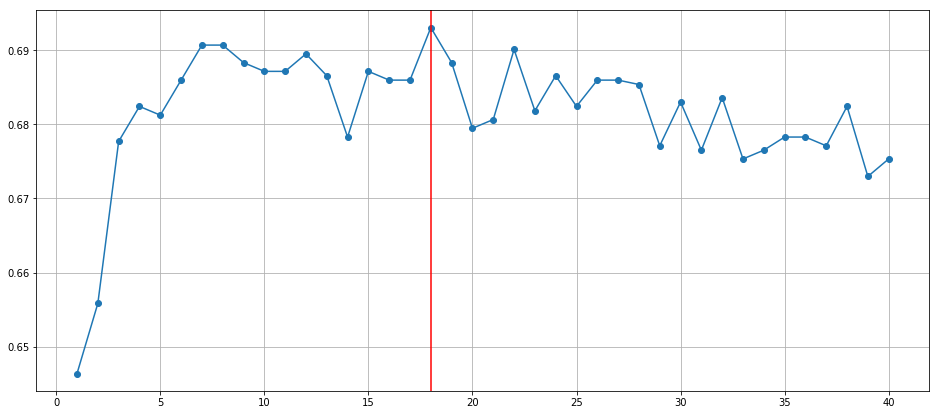

In [614]:
# Plotting BIC vs Number of features

plt.figure(figsize=(16,7))
plt.plot(range(1,41),accuracy,marker='o')
plt.grid(b=True)

plt.axvline(x=np.argmax(accuracy)+1,c='r')
plt.show()

In [652]:
best_model_data = X_bete[best_model]

In [639]:
X_train, X_test, y_train, y_test = train_test_split(best_model_data, y, test_size=0.20, random_state=42)
clf = LogisticRegression()
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)
metrics.accuracy_score(y_test,yhat)

0.6895328208160851

In [646]:
cv = cross_validate(clf,best_model_data,y,cv=5)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.06464839, 0.05787706, 0.06396604, 0.05868697, 0.06505585]),
 'score_time': array([0.00100875, 0.0008719 , 0.00078702, 0.00109005, 0.00081325]),
 'test_score': array([0.65759905, 0.67534004, 0.68835009, 0.70118343, 0.69467456]),
 'train_score': array([0.69254658, 0.69047619, 0.68855368, 0.68342452, 0.68623392])}

In [647]:
y.value_counts()

0    4915
1    3538
Name: stars, dtype: int64

#### Statsmodel

In [653]:
import statsmodels.api as sm
best_model_data = sm.add_constant(best_model_data)
mdl = sm.Logit(y, best_model_data)
mdl_fit = mdl.fit(maxiter=100)
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.577744
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  stars   No. Observations:                 8453
Model:                          Logit   Df Residuals:                     8418
Method:                           MLE   Df Model:                           34
Date:                Thu, 06 Dec 2018   Pseudo R-squ.:                  0.1502
Time:                        14:56:49   Log-Likelihood:                -4883.7
converged:                       True   LL-Null:                       -5746.5
                                        LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.5554      0.365    -15.200      0.000      

In [654]:
mdl_fit.pred_table()

array([[3909., 1006.],
       [1608., 1930.]])

#### CV

##### Logistic

In [382]:
from sklearn.model_selection import cross_validate
X_train, X_test, y_train, y_test = train_test_split(best_model_data, y, test_size=0.20, random_state=42)
    
clf = LogisticRegression(C=1500)
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)


In [383]:
metrics.f1_score(y_test,yhat)

0.621011673151751

In [377]:
cv = cross_validate(clf,best_model_data,y,cv=5)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.12950206, 0.16980219, 0.13263798, 0.12694883, 0.12242723]),
 'score_time': array([0.00100589, 0.00077987, 0.00079012, 0.00078416, 0.00078082]),
 'test_score': array([0.65641632, 0.6759314 , 0.69544648, 0.68461538, 0.68343195]),
 'train_score': array([0.69506063, 0.69077196, 0.6844129 , 0.68786042, 0.68963478])}

In [378]:
np.mean(cv['test_score'])

0.6791683083781523

~68%; does not overfit, train scores are comparable to test

##### Random Forest

In [379]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
yhat = clf.predict(X_test)

In [380]:
cv = cross_validate(clf,best_model_data,y,cv=5)
cv

/Users/sahilaggarwal/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.23335314, 0.24384189, 0.20250297, 0.28101182, 0.23325396]),
 'score_time': array([0.00481486, 0.0050652 , 0.00474119, 0.006742  , 0.00632405]),
 'test_score': array([0.6463631 , 0.65109403, 0.63926671, 0.65325444, 0.66153846]),
 'train_score': array([0.98151434, 0.97855664, 0.97959184, 0.97929913, 0.97959485])}

Random forest overfits, Logistic does not, Train acc is ~98%

In [381]:
metrics.f1_score(y_test,yhat)

0.5310457516339869